# DFA on healthy and diseased subjects

The computation of the Hurst exponent of healthy and not healthy subjects is available in this notebook. The goal is to be able to compare the heart rate time series of various subjects and determine the difference between the ones that are healthy and the ones that aren't. The dataset available at the following url was used. 

https://physionet.org/content/chaos-heart-rate/1.0.0/

This dataset contains the heart rate signal of 15 subjects which can be devided into 3 subsets:
- The first one contains healthy subjects (available in the files 'nxrr.txt')
- The second one contains subjects with congestive heart failure (available in 'cxrr.txt')
- The last one contains subjects with atrial fibrillation (available in 'axrr.txt')

with $x \in [1,5]$

It happens that some signals contain abnormal heart beats (especially in the ones of subjects with congestive heart failues). The intervals that precede and follow these beats should be considered as outliers. For this, a second serie 'nn' was proposed. The DFA analysis being very sensitive to outliers, the serie 'nn' should be preferred to the 'rr' serie.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

import sys
sys.path.append('../')
import FractalAnalysis as fa

# Get the data

In [9]:
def get_beats(subject, abnormal=False):
    """
    Get the heart rate data for a given subject

    Arguments:
    - subject:  ID of the subject to get the heart rate. Must be of the format
                "group" + "number" + "nn". Where group is n (healthy), c 
                (congestive heart failure) or a (atrial fibrillation) and the
                number is between 1 and 5.
    - abnormal: True to print the proportion of abnormal beats (i.e. noisy 
                data), False otherwise

    Returns:
    - A numpy array with the heart rate (interbeats) signal
    """
    with open('../Heart-rates-disease/' + subject + '.txt') as f:
        lines = f.readlines()

    beats = []
    
    count_abnormal = 0
    count = 0

    for line in lines:
        line = line.split()
        if line[1] != "N":
            count_abnormal += 1
        beats.append(float(line[0]))
        count += 1
    
    if abnormal:
        print("Abnormal beats: ", count_abnormal/count*100, "%")
    return beats


def Ivanov_bounds(beats):
    """
    For a given signal, this method gets the bounds at which a value will be
    considered an outlier

    Arguments:
    - beats: the signal

    Returns:
    - the bound for which any lower value is an outlier
    - the bound for which any higher value is an outlier
    """
    Q1 = np.percentile(beats, 25)
    Q3 = np.percentile(beats, 75)
    IQR = Q3 - Q1

    upper = np.where(beats >= (Q3+1.5*IQR))
    lower = np.where(beats <= (Q1-1.5*IQR))
    
    return Q3+1.5*IQR, Q1-1.5*IQR


def plot_beats(b, title):
    """
    For a given heart rate signal, plot that signal

    Arguments:
    - b: the heart rate signal
    - title: the title of the plot
    """

    upper, lower = Ivanov_bounds(b)
    print("bounds: ", upper, lower)
    f = plt.figure()
    f.set_figwidth(8)
    f.set_figheight(4)
    plt.title(title)
    plt.plot(b)
    plt.ylabel("RR interval(seconds)")
    plt.xlabel("beats")
    #plt.ylim(0.2,1.5)
    plt.savefig(title + ".pdf")
    plt.show()



## Plot all signals

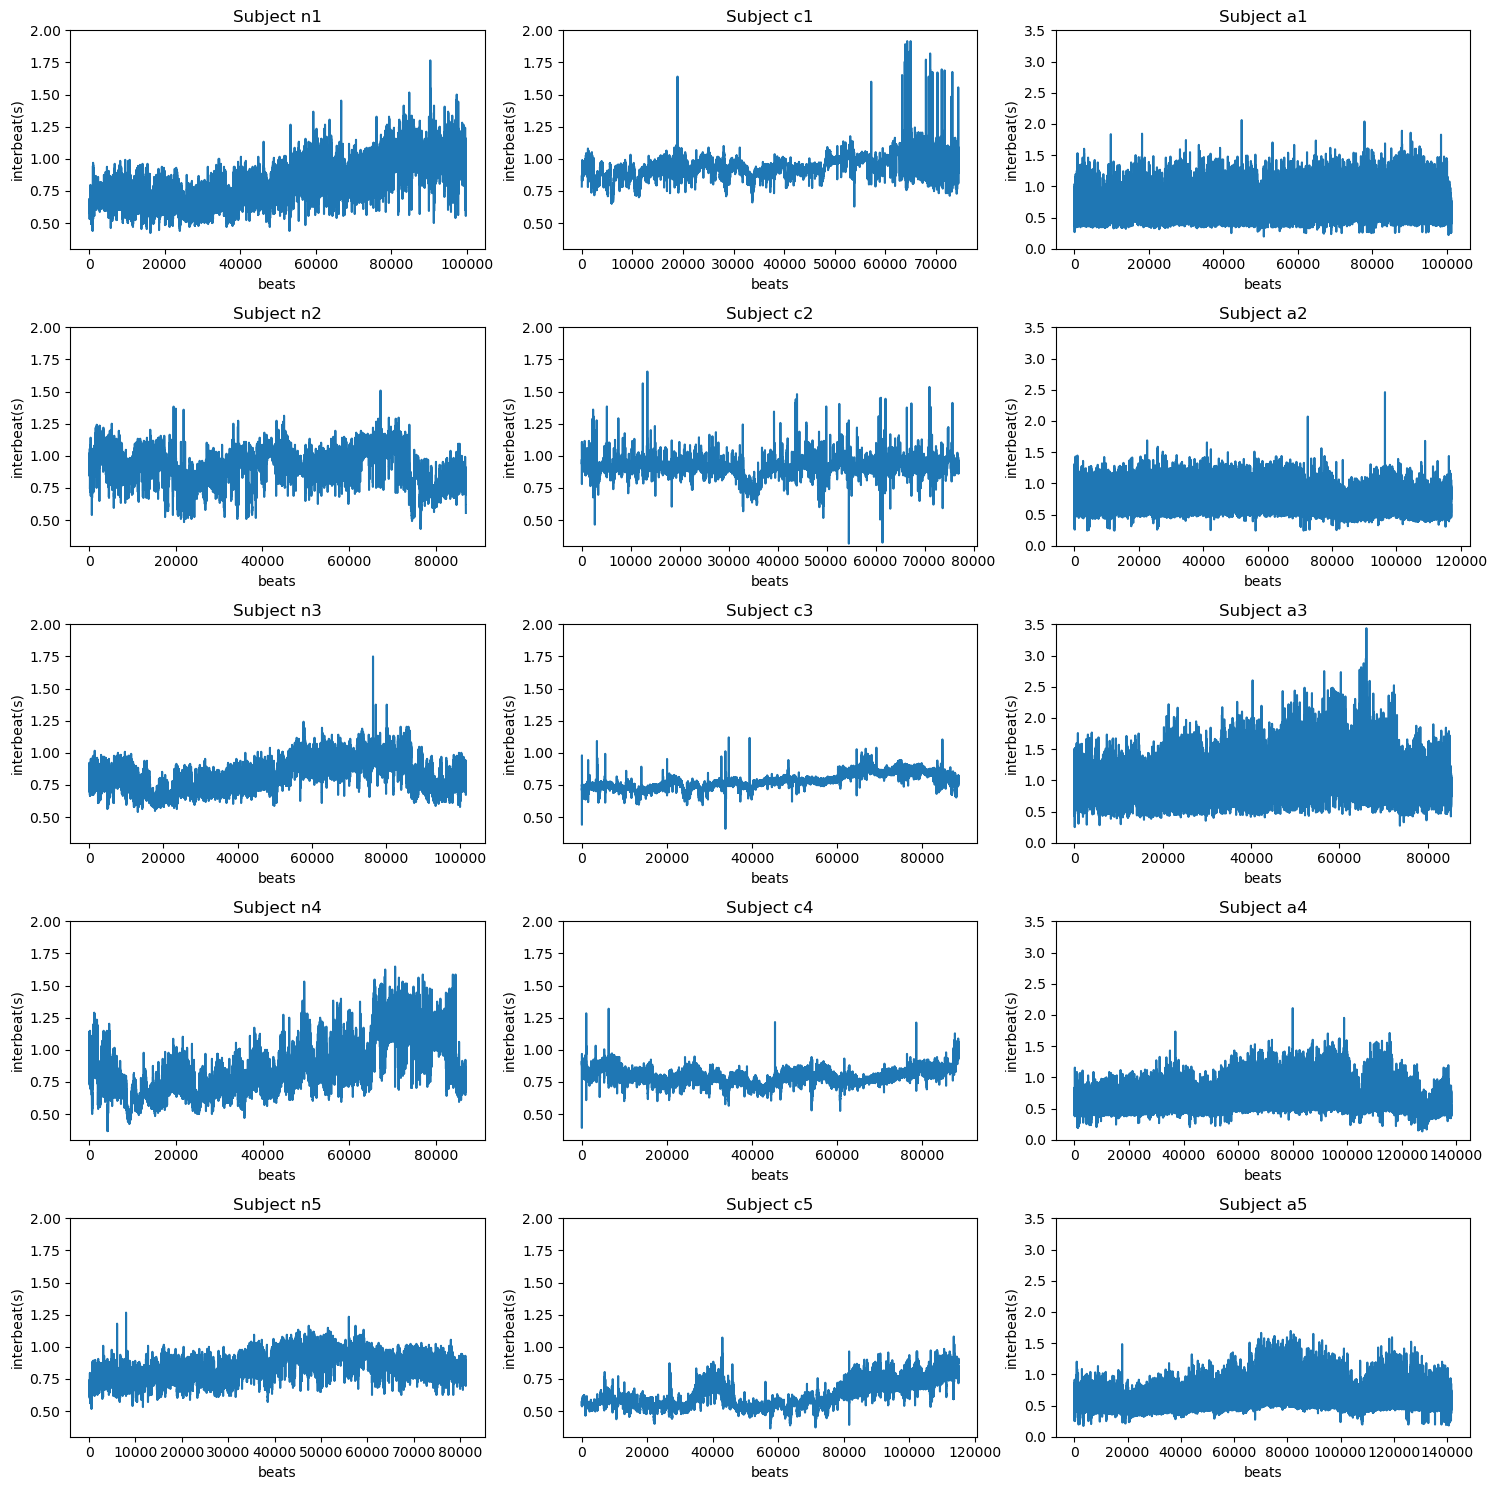

In [10]:
def subplots(x, title, limit1, limit2):
    plt.plot(x)
    plt.ylim(limit1, limit2)
    plt.xlabel("beats")
    plt.ylabel("interbeat(s)")
    plt.title(title)


fig,ax = plt.subplots(nrows=5,ncols=3,figsize=(15,15))
plt.subplots_adjust(hspace=0.4,wspace=0.2)

for i in range(5):
    # Healthy subject plot
    plt.subplot(5,3,i*3+1)
    x = get_beats("n" + str(i+1) + "nn")
    subplots(x, "Subject n" + str(i+1), 0.3, 2)

    # Subject with congestive heart failure plot
    plt.subplot(5,3,i*3+2)
    x = get_beats("c" + str(i+1) + "nn")
    subplots(x, "Subject c" + str(i+1), 0.3, 2)

    # Subject with atrial fibrillation plot
    plt.subplot(5,3,i*3+3)
    x = get_beats("a" + str(i+1) + "nn")
    subplots(x, "Subject a" + str(i+1), 0, 3.5)

plt.tight_layout()
plt.savefig("signals_all.pdf")
plt.show()

## Healthy subjects

Abnormal beats:  0.0 %
bounds:  1.3410000000000002 0.245


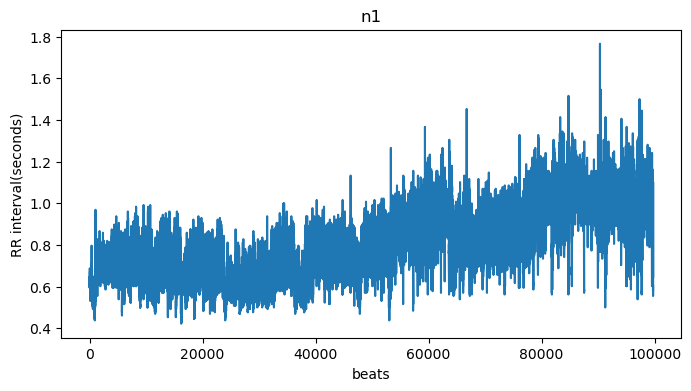

Abnormal beats:  0.0 %
bounds:  1.3155 0.5355000000000001


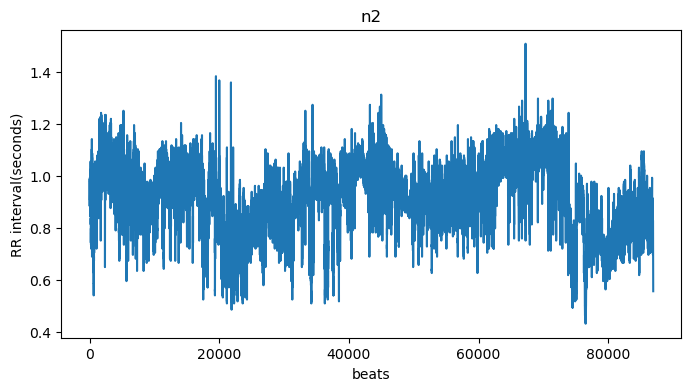

Abnormal beats:  0.0 %
bounds:  1.2040000000000002 0.4519999999999999


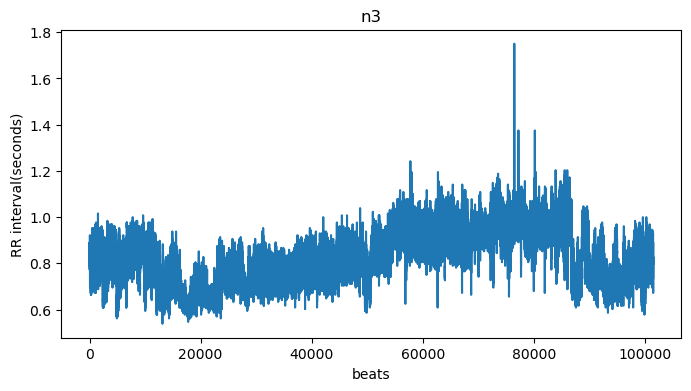

Abnormal beats:  0.0 %
bounds:  1.4855 0.23349999999999987


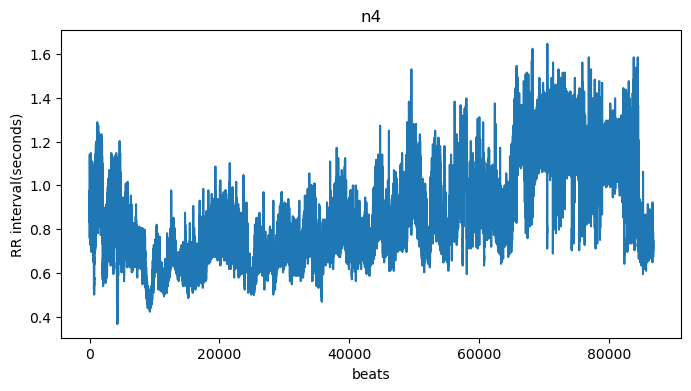

Abnormal beats:  0.0 %
bounds:  1.1655000000000002 0.5375


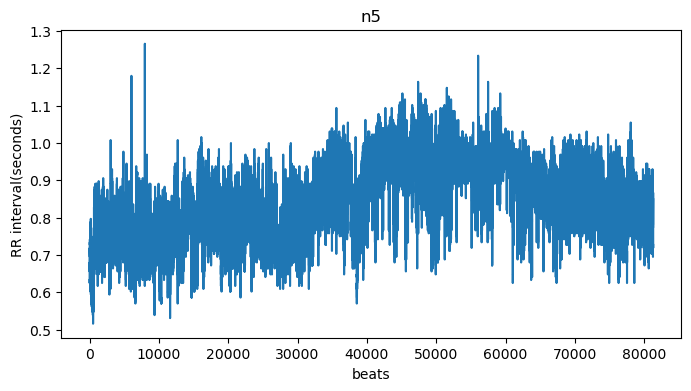

In [11]:
for i in range(5):
    subject = 'n' + str(i+1) + 'nn'
    n = get_beats(subject, abnormal=True)
    plot_beats(n, "n" + str(i+1))


## Subjects with atrial fibrillation

Abnormal beats:  0.0 %
bounds:  1.2215 0.1295


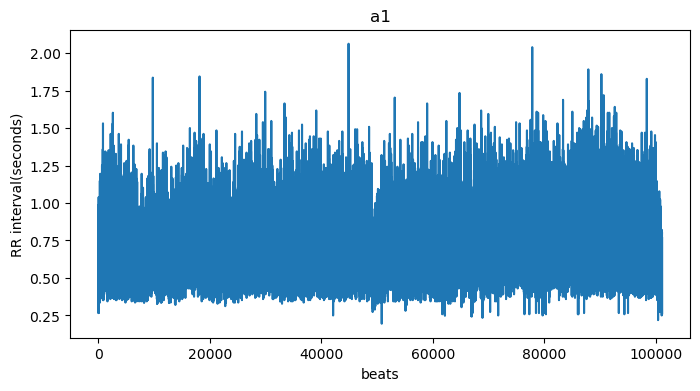

Abnormal beats:  0.0 %
bounds:  1.1404999999999998 0.32850000000000007


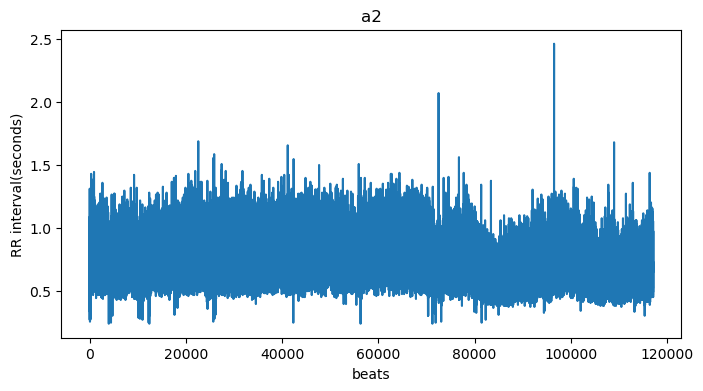

Abnormal beats:  0.0 %
bounds:  1.5665 0.4104999999999999


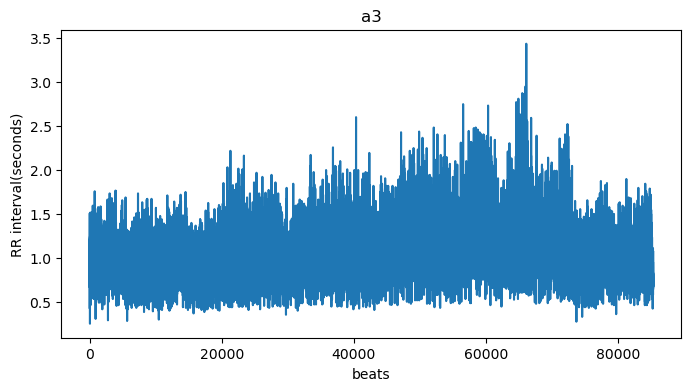

Abnormal beats:  0.0 %
bounds:  1.001 0.2490000000000001


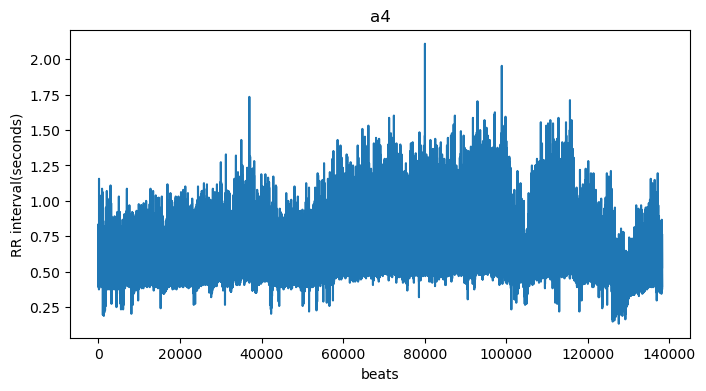

Abnormal beats:  0.0 %
bounds:  0.9834999999999998 0.2355000000000001


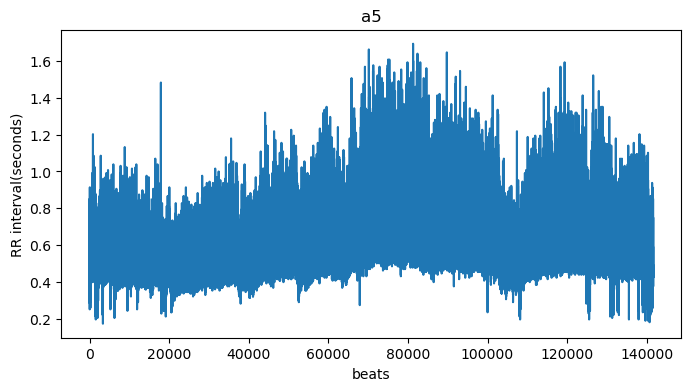

In [12]:
for i in range(5):
    subject = 'a' + str(i+1) + 'nn'
    a = get_beats(subject, abnormal=True)
    plot_beats(a, "a" + str(i+1))
        

## Subjects with congestive heart failure

Abnormal beats:  0.0 %
bounds:  1.148 0.764


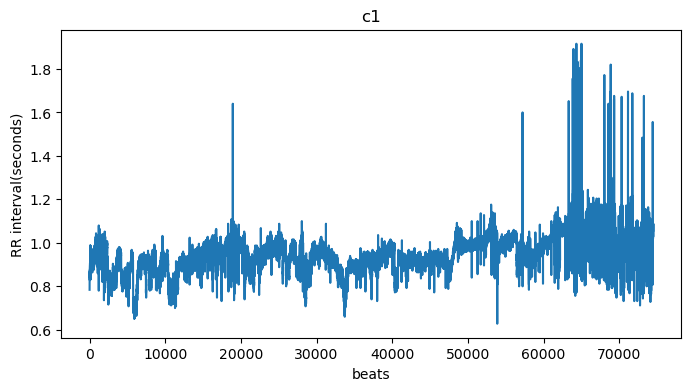

Abnormal beats:  0.0 %
bounds:  1.0020000000000002 0.7939999999999999


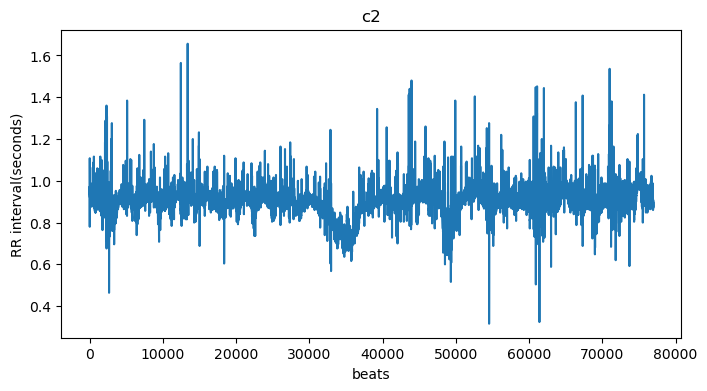

Abnormal beats:  0.0 %
bounds:  0.95 0.6140000000000001


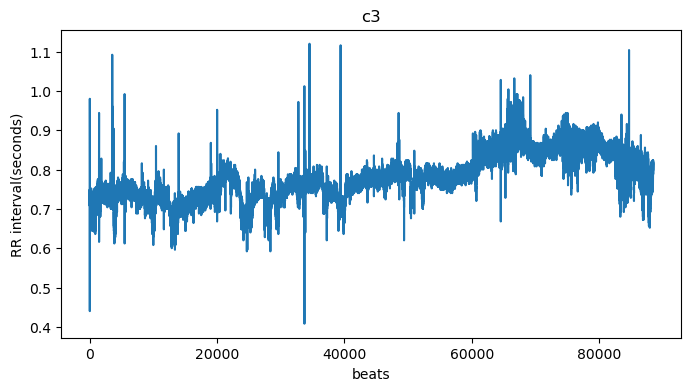

Abnormal beats:  0.0 %
bounds:  0.946 0.6420000000000001


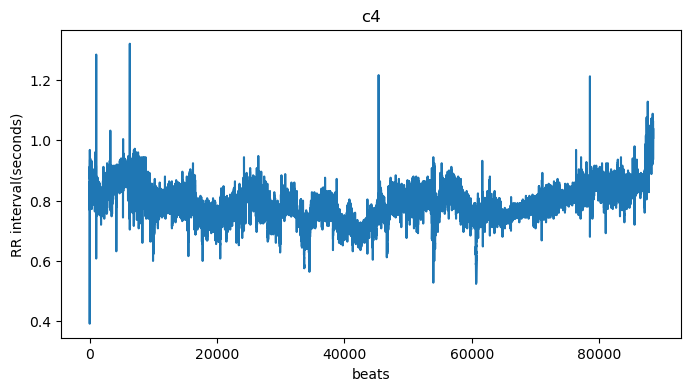

Abnormal beats:  0.0 %
bounds:  0.9499999999999998 0.29400000000000015


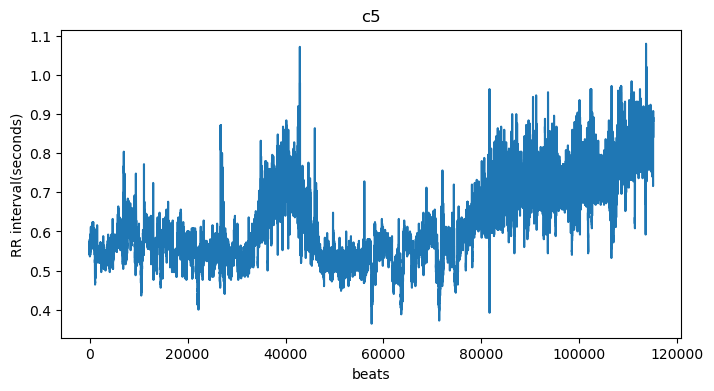

In [13]:
for i in range(5):
    subject = 'c' + str(i+1) + 'nn'
    c = get_beats(subject, abnormal=True)
    plot_beats(c, "c" + str(i+1))

# Hurst exponent comparison

First, let's get the $\alpha$ and $\beta$ values of each subject.

In [24]:
def get_alphas(beats, lag, start=5, end=500, plot=False, title="", order=1):
    """
    Compute the alpha coefficient with the DFA method of a given signal

    Arguments:
    - beats: the heart rate signal to be analysed
    - lag: the scales to be considered with the DFA method (for the second method)
    - start: the smallest scale to be considered (for the first method)
    - end: the largest scale to be considered (for the first method)
    - plot: True if the curve of the DFA method is plotted
    - title: title of the plot
    - order: order of the detrending

    Returns:
    - the alpha coefficient computed with the first method (reimplemented)
    - the alpha coefficient computed with the second method (MFDFA package)
    """
    alpha1 = fa.DFA_fast(beats, limit_end = end, limit_start=start, plot=False, order=order)
    #alpha1 = 0
    alpha2 = fa.DFA2(beats, lag, plot=plot, title="Subject " + title, order=order, save= True, show=False)
    
    return alpha1, alpha2

100%|██████████| 5/5 [00:05<00:00,  1.16s/it]


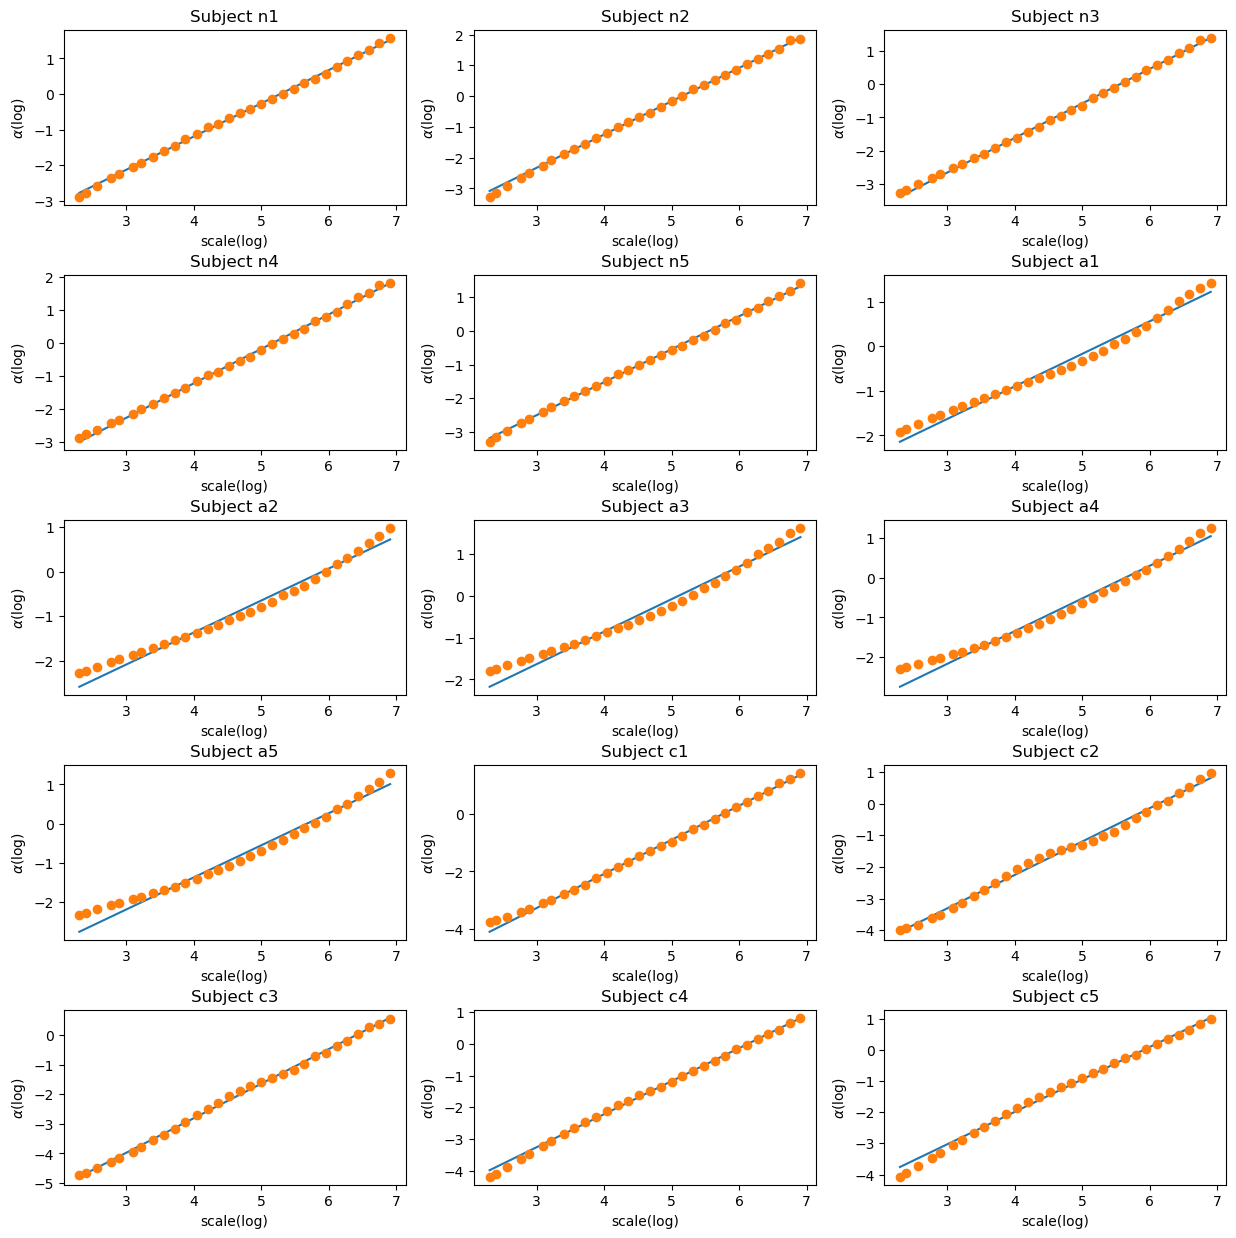

In [28]:
alphas = []     # alpha coefficients with the first DFA method
alphas_2 = []   # alpha coefficients with the second DFA method
betas = []      # beta coefficient with the power spectrum analysis
alphas_order2 = []  # alpha coefficients with the second DFA method with order of detrending = 2
alphas_order3 = []  # alpha coefficients with the second DFA method with order of detrending = 3

subgroups = ['n', 'a', 'c'] # Group names (n healthy, c congestive heart failure, a atrial fibrillation)
outliers = 'nn' # Use the data without abnormal beats

start = 10  # Smallest scale for the DFA method
end = 1000  # Largest scale for the DFA method
x = np.linspace(np.log(start), np.log(end), 30)
lag = np.exp(x).astype(int)

# Define the plot
fig,ax = plt.subplots(nrows=5,ncols=3,figsize=(15,15))
plt.subplots_adjust(hspace=0.4,wspace=0.2)
cnt = 1

# Compute the alpha/beta coefficient for all subjects
for g in subgroups:  
    for i in tqdm(range(5)):
        beats = get_beats(g + str(i+1) + outliers)
        plt.subplot(5,3,cnt)
        cnt += 1

        # DFA
        alpha1, alpha2 = get_alphas(beats, lag, start=start, end=end, plot=True, title=g + str(i+1), order=1)
        alphas.append(alpha1)
        alphas_2.append(alpha2)

        # DFA with order > 1
        alpha1, alpha2 = get_alphas(beats, lag, start=start, end=end, plot=False, title=g + str(i+1), order=2)
        alphas_order2.append(alpha2)
        alpha1, alpha2 = get_alphas(beats, lag, start=start, end=end, plot=False, title=g + str(i+1), order=3)
        alphas_order3.append(alpha2)

        # Power spectrum analysis
        beta = fa.PowerSpectrumAnalysis(beats)
        betas.append(beta)

plt.show()

## Plot results

In [19]:
def bar_plot(measures, title):
    x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    width = 0.8

    fig, ax = plt.subplots()
    rects1 = ax.bar(x[:5], measures[:5], width, color="lightskyblue", ec="black")
    rects2 = ax.bar(x[5:10], measures[5:10], width, color="royalblue", ec="black")
    rects3 = ax.bar(x[10:], measures[10:], width, color="orchid", ec="black")

    ax.set_ylabel(r'$\alpha$')
    ax.set_xlabel('subject')
    ax.set_title(title)
    ax.set_xticks(np.add(x, (width / 2)))  # set the position of the x ticks
    ax.set_xticklabels(x)

    def autolabel(rects):
        # attach some text labels
        i = 0
        for rect in rects:
            height1 = rect.get_height()
            height2 = round(rect.get_height(), 2)
            ax.text(rect.get_x() + rect.get_width() / 2., 1.005 * height1, height2, ha='center', va='bottom')
            i += 1

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)
    ax.legend((rects1[0], rects2[0], rects3[0]), ('n', 'a', 'c'), loc='lower left')
    plt.savefig("DFA_heart_rate_10_1000.pdf")
    plt.show()

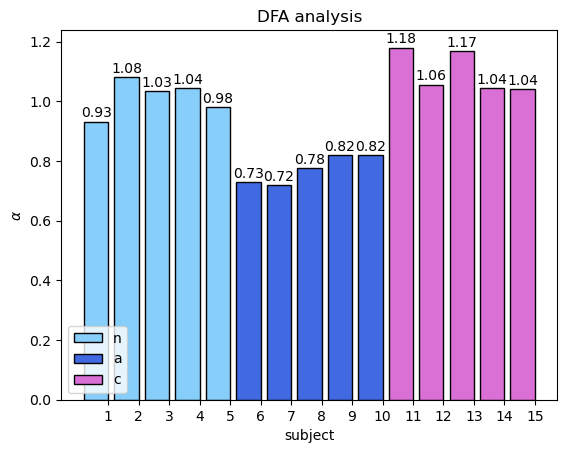

In [20]:
bar_plot(alphas_2, "DFA analysis")

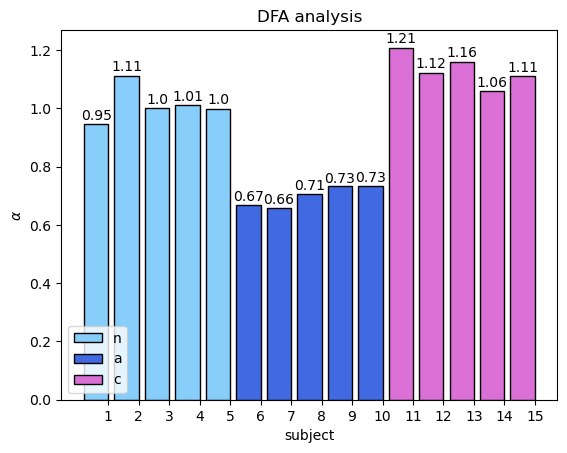

In [21]:
bar_plot(alphas, "DFA analysis")

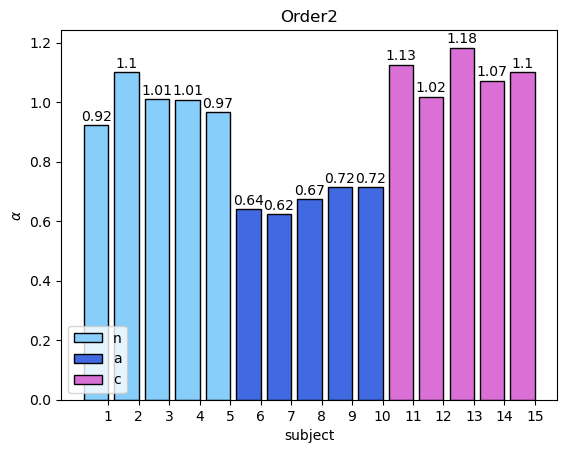

In [29]:
bar_plot(alphas_order2, "Order2")

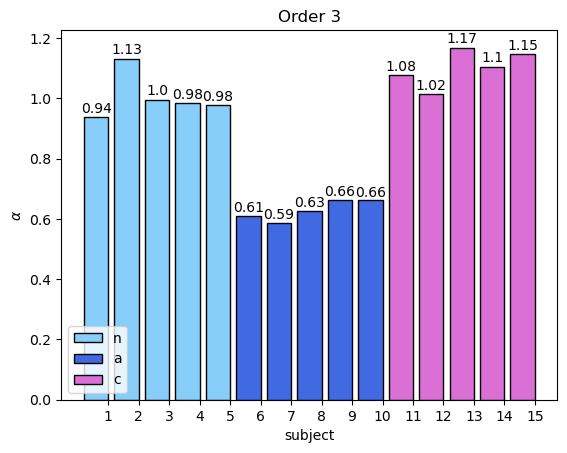

In [30]:
bar_plot(alphas_order3, "Order 3")

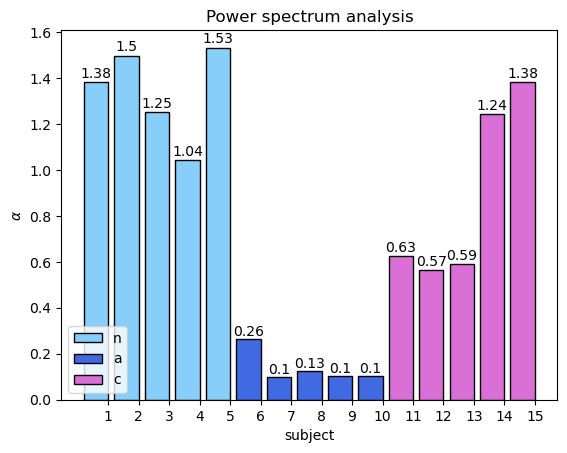

In [31]:
bar_plot(betas, "Power spectrum analysis")

# DFA on a divided subset
The signals being very long, it could be interesting to measure the Hurst exponent of pieces of the signals. This will be done in two different ways:
- divide the signals based on the number of points
- divide the signals on a per hour basis

### Divide by number of beats
In this section, the same analysis as the one made in *Peng et al (1995) "Quantification of scaling exponents and crossover phenomena in nonstationary
heartbeat time series" in Chaos* will be reproduced. This analysis took signals of size 8192 and performed DFA using scales between 4 and 16 and between 16 and 64.

In [6]:
def divide_size(lst, p):
    """
    Divides a given time series into sub time series of size p

    Arguments:
    - lst: the time series to be divided
    - p: the length of the sub time series

    Returns:
    - a list made of all the sub time series
    """
    if len(lst) < p:
        return []
    
    return [lst[:p]] + divide_size(lst[p:], p)


def get_interval(g, lag):
    """
    For a given group, computes the interval in the form mean +- std in which the coefficient
    alpha computed with DFA remains

    Arguments:
    - g: the group considered (n, c or a)
    - lag: the scales to consider with DFA

    Returns:
    - A list of size 2 with the bounds of the interval
    """
    num_tests = 0  
    alphas = []
    for i in tqdm(range(5)):
        beats = get_beats(g + str(i+1) + outliers)
        divide_beats = divide_size(beats, 8192)
        num_tests += len(divide_beats)
        for el in divide_beats:
            alpha = fa.DFA2(el, lag, plot=False, title=g+str(i+1))
            alphas.append(alpha)

    print(np.mean(alphas), "+-", np.std(alphas))
    inter = [np.mean(alphas) - np.std(alphas), np.mean(alphas) + np.std(alphas)]

    return inter


In [8]:
x = np.linspace(np.log(4), np.log(16), 30)
lag1 = np.exp(x).astype(int)
x = np.linspace(np.log(16), np.log(64), 30)
lag2 = np.exp(x).astype(int)

subgroups = ['a', 'c', 'n']
outliers = 'nn'
intervals1 = []
intervals2 = []

# Results from Peng et al.
alpha1_healthy = [1.201-0.178, 1.201+0.178] 
alpha2_healthy = [0.998-0.124, 0.998+0.124]
alpha1_cong = [0.803-0.259, 0.803+0.259]
alpha2_cong = [1.125-0.216, 1.125+0.216]

# Compute the intervals
for g in subgroups:
    inter1 = get_interval(g, lag1)
    inter2 = get_interval(g, lag2)
    intervals1.append(inter1)
    intervals2.append(inter2)

    if g == 'n':
        intervals1.append(alpha1_healthy)
        intervals2.append(alpha2_healthy)
    if g == 'c':
        intervals1.append(alpha1_cong)
        intervals2.append(alpha2_cong)
        

100%|██████████| 5/5 [00:02<00:00,  1.82it/s]


0.6038683495536733 +- 0.04920385714761122


100%|██████████| 5/5 [00:01<00:00,  2.51it/s]


0.5453321835078476 +- 0.03925052869747826


100%|██████████| 5/5 [00:02<00:00,  2.46it/s]


0.9968720586388826 +- 0.2854451785210471


100%|██████████| 5/5 [00:01<00:00,  3.30it/s]


1.2254226556387917 +- 0.11900294703789033


100%|██████████| 5/5 [00:02<00:00,  2.12it/s]


1.2102892460785342 +- 0.17537409123420306


100%|██████████| 5/5 [00:01<00:00,  3.06it/s]

0.9915422134087138 +- 0.11672091814225229


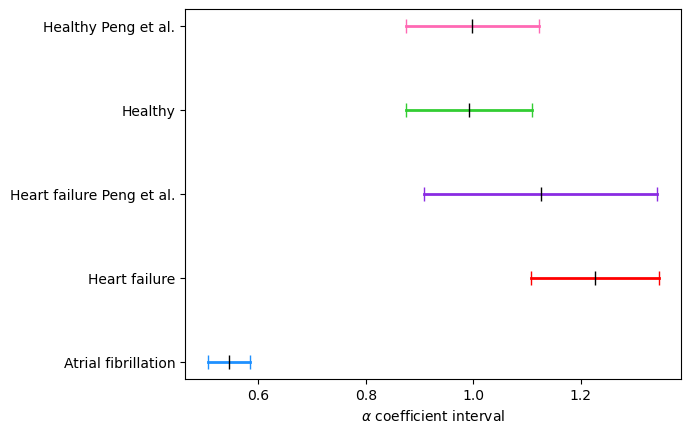

In [28]:
intervals = intervals2 # Intervals to be plotted

# Create a figure and axis
fig, ax = plt.subplots()

colors = ["dodgerblue", "red", "blueviolet", "limegreen", "hotpink"]

# Plot each interval as a horizontal line segment
for i, (start, end) in enumerate(intervals):
    color = colors[i]
    # Plot the interval line segment
    ax.plot([start, end], [i, i], color=color, linewidth=2)

    # Plot small bars at the middle and ends of the interval
    mid = (start + end) / 2  # Calculate the middle point of the interval
    ax.plot(mid, i, color='black', marker='|', markersize=10)  # Middle bar
    ax.plot(start, i, color=color, marker='|', markersize=10)  # Start bar
    ax.plot(end, i, color=color, marker='|', markersize=10)  # End bar

# Set the y-axis ticks and labels
ax.set_yticks(range(len(intervals)))
y_labels = ["Atrial fibrillation", "Heart failure", "Heart failure Peng et al.", "Healthy", "Healthy Peng et al."]
ax.set_yticklabels(y_labels)

plt.xlabel(r"$\alpha$ coefficient interval")
plt.savefig("interval2.pdf")

# Show the plot
plt.show()

### Divide by hours

In [31]:
def divide_by_hours(beats):
    """
    Divides a given time series into sub time series of time 3600s

    Arguments:
    - lst: the time series to be divided

    Returns:
    - a list made of all the sub time series
    """
    count = 0
    divided_beats = []
    start = 0
    
    for i in range(len(beats)):
        count += beats[i]
        
        if count > 3600:
            new_beats = beats[start:i+1]
            count = 0
            divided_beats.append(new_beats)
            start = i+1
            
    return divided_beats

100%|██████████| 5/5 [00:02<00:00,  1.75it/s]


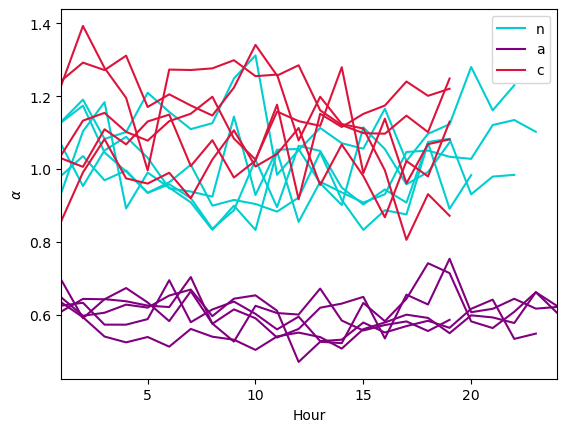

2850


In [36]:
x = np.linspace(np.log(3), np.log(300), 30)
scales = np.exp(x).astype(int)
lag = scales
subgroups = ['n', 'a', 'c']
outliers = 'nn'

for g in subgroups:  
    for i in tqdm(range(5)):
        alphas = []
        beats = get_beats(g + str(i+1) + outliers)
        divide_beats = divide_by_hours(beats)

        # Compute alpha
        for el in divide_beats:
            alpha = fa.DFA2(el, lag)
            alphas.append(alpha)

        # Plot
        x = np.linspace(1, len(divide_beats), len(divide_beats))
        if g == 'n':
            if i == 0:
                plt.plot(x, alphas, color = 'darkturquoise', label = "n")
            else:
                plt.plot(x, alphas, color = 'darkturquoise')
        elif g == 'a':
            if i == 0:
                plt.plot(x, alphas, color = 'purple', label = "a")
            else:
                plt.plot(x, alphas, color = 'purple')
        else:
            if i == 0:
                plt.plot(x, alphas, color = 'crimson', label = "c")
            else:
                plt.plot(x, alphas, color = 'crimson')
                
plt.legend()
plt.xlabel("Hour")
plt.ylabel(r"$\alpha$")
plt.xlim((1,24))
plt.savefig("hours.pdf")
plt.show()
        

In [29]:
def get_means(alphas):
    """
    Given a list of lists of different size, compute the mean of each element at the same 
    index

    Arguments:
    - alphas: the list of lists

    Returns:
    - a list of the largest size of the lists containing the mean of all elements at a given
        index
    """
    new_alphas = []
    end = max(len(alphas[0]), len(alphas[1]), len(alphas[2]), len(alphas[3]), len(alphas[4]))

    for i in range(end):
        tmp = []
        for j in range(5):
            if len(alphas[j]) > i:
                tmp.append(alphas[j][i])

        tmp = np.array(tmp)
        new_alphas.append(np.mean(tmp))

    return new_alphas
        


100%|██████████| 5/5 [00:02<00:00,  2.14it/s]


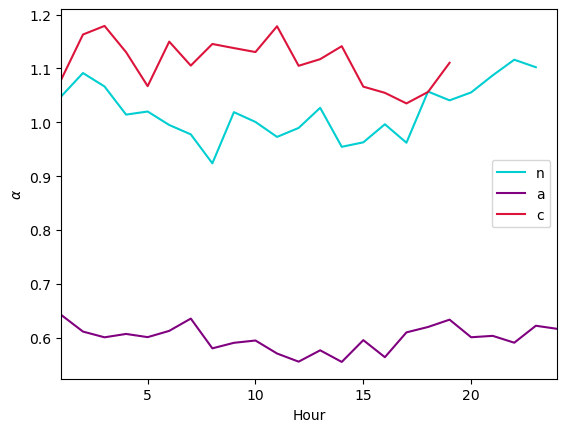

2850


In [35]:
# Print the mean at each time of each group
x = np.linspace(np.log(3), np.log(300), 30)
scales = np.exp(x).astype(int)
lag = scales
subgroups = ['n', 'a', 'c']
outliers = 'nn'

for g in subgroups:  
    alphas = []
    for i in tqdm(range(5)):
        tmp = []
        beats = get_beats(g + str(i+1) + outliers)
        divide_beats = divide_by_hours(beats)

        # Compute alpha
        for el in divide_beats:
            alpha = fa.DFA2(el, lag)
            tmp.append(alpha)
        alphas.append(tmp)

        # Plot
        if i == 4:
            alphas = get_means(alphas)
            x = np.linspace(1, len(alphas), len(alphas))
            if g == 'n':
                plt.plot(x, alphas, color = 'darkturquoise', label = "n")
            elif g == 'a':
                plt.plot(x, alphas, color = 'purple', label = "a")
            else:
                plt.plot(x, alphas, color = 'crimson', label = "c")
                
plt.legend()
plt.xlabel("Hour")
plt.ylabel(r"$\alpha$")
plt.xlim((1,24))
plt.savefig("hours_means.pdf")
plt.show()
        

# Removing outliers methods (not used)

In [ ]:
"""Remove the outliers on a given signal"""
def remove_outliers(beats):
    tn = pd.DataFrame(beats)
    
    Q1 = np.percentile(tn, 25, interpolation= 'midpoint')
    Q3 = np.percentile(tn, 75, interpolation= 'midpoint')
    IQR = Q3 - Q1

    upper = np.where(tn >= (Q3+1.5*IQR))
    lower = np.where(tn <= (Q1-1.5*IQR))

    tn.drop(upper[0], inplace = True)
    tn.drop(lower[0], inplace = True)
    
    tn = tn.to_numpy()
    tn = [x[0] for x in tn]
    
    return tn

In [ ]:
"""Divide the given signal into 100 subsignals and remove the outliers on each of these segments"""
def remove_outliers2(beats):
    start = 0
    end = len(beats)
    div_signal = []
    len_div = 1000
    for i in range(start, end, len_div):
        if i+len_div < end:
            div_signal.append(beats[i:i+len_div])
            
    final_signal = []
    
    for b in div_signal:
    
        tn = pd.DataFrame(b)

        Q1 = np.percentile(tn, 25, interpolation= 'midpoint')
        Q3 = np.percentile(tn, 75, interpolation= 'midpoint')
        IQR = Q3 - Q1

        upper = np.where(tn >= (Q3+1.5*IQR))
        lower = np.where(tn <= (Q1-1.5*IQR))

        tn.drop(upper[0], inplace = True)
        tn.drop(lower[0], inplace = True)

        tn = tn.to_numpy()
        tn = [x[0] for x in tn]
        
        final_signal = final_signal + tn
    
    return final_signal